# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

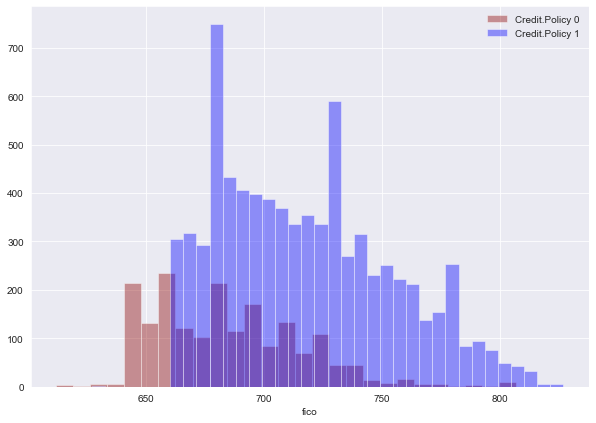

In [5]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(loans[loans['credit.policy'] == 0]['fico'], color = 'darkred', kde = False, label ='Credit.Policy 0')
sns.distplot(loans[loans['credit.policy'] == 1]['fico'], color = 'blue', kde = False, label ='Credit.Policy 1')
plt.legend(frameon = False)

** Create a similar figure, except this time select by the not.fully.paid column.**

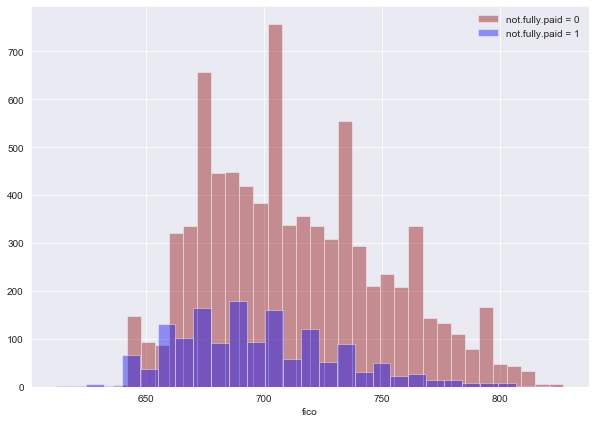

In [6]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(loans[loans['not.fully.paid'] == 0]['fico'], color = 'darkred', kde = False, label ='not.fully.paid = 0')
sns.distplot(loans[loans['not.fully.paid'] == 1]['fico'], color = 'blue', kde = False, label ='not.fully.paid = 1')
plt.legend(frameon = False)

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

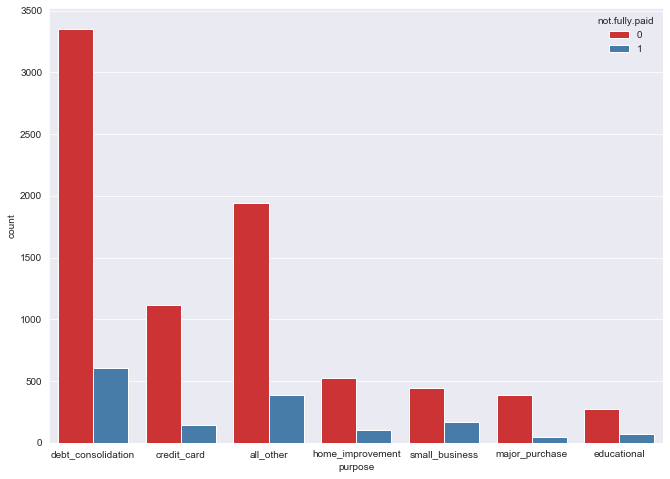

In [7]:
plt.figure(figsize=(11,8))
sns.countplot('purpose', data = loans, hue = 'not.fully.paid', palette = 'Set1')
plt.legend(frameon = False, title = 'not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

In [8]:
matrix = []

for i in loans['purpose'].unique():
    matrix.append([i, (len(loans[(loans['not.fully.paid'] == 0) & (loans['purpose'] == i)])/len(loans[loans['purpose'] == i])*100),
                  (len(loans[(loans['not.fully.paid'] == 1) & (loans['purpose'] == i)])/len(loans[loans['purpose'] == i])*100)])
pd.DataFrame(matrix, columns = ['Purpose', 'Full%', 'Not Full%'])    

Purpose      Full%  Not Full%
0  debt_consolidation  84.761183  15.238817
1         credit_card  88.431062  11.568938
2           all_other  83.397683  16.602317
3    home_improvement  82.988871  17.011129
4      small_business  72.213247  27.786753
5      major_purchase  88.787185  11.212815
6         educational  79.883382  20.116618

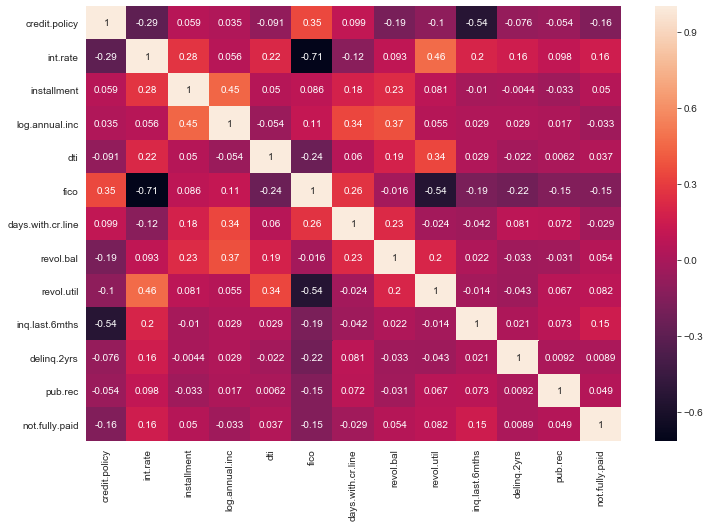

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(loans.corr(), annot = True)

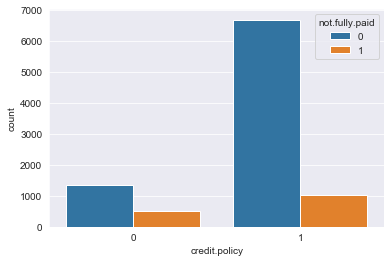

In [10]:
sns.countplot(x = 'credit.policy', hue='not.fully.paid', data = loans)

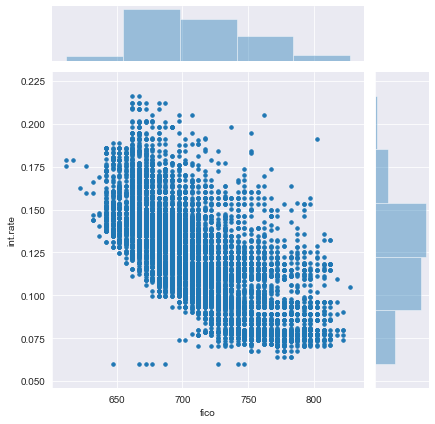

In [11]:
sns.jointplot(x = 'fico', y = 'int.rate', cmap = 'Set1', data = loans, s =12, marginal_kws=dict(bins=5))

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

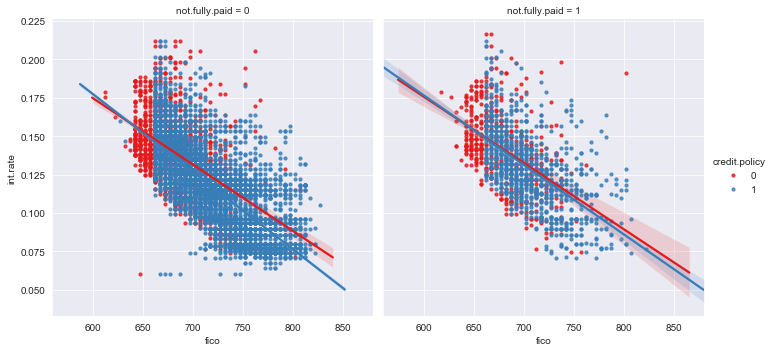

In [12]:
sns.lmplot(data = loans, x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1', 
           scatter_kws = {'s':10})

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [14]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [15]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first =True)

In [16]:
final_data.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [17]:
final_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['not.fully.paid'], axis =1), final_data['not.fully.paid'], 
                                                    test_size = 0.30)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [21]:
dtree = DecisionTreeClassifier(min_samples_leaf = 2)

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [23]:
pred = dtree.predict(X_test)

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [25]:
feature = list(final_data.drop(['not.fully.paid'], axis = 1).columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = feature,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863107 to fit



In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2443
           1       0.21      0.20      0.20       431

    accuracy                           0.77      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.77      0.76      2874



In [28]:
print(confusion_matrix(y_test, pred))

[[2114  329]
 [ 345   86]]


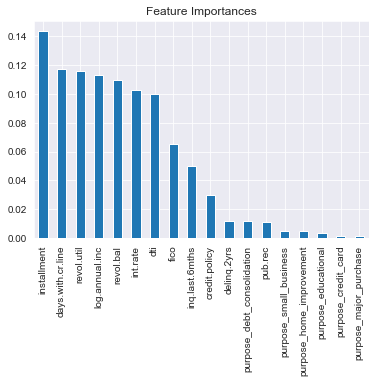

In [29]:
coef1 = pd.Series(dtree.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind = 'bar', title ='Feature Importances')

In [30]:
pd.DataFrame(dtree.predict_proba(X_test)).head()

0    1
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
pred = rfc.predict(X_test)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2443
           1       0.36      0.02      0.04       431

    accuracy                           0.85      2874
   macro avg       0.61      0.51      0.48      2874
weighted avg       0.78      0.85      0.79      2874



In [34]:
print(confusion_matrix(y_test, pred))

[[2427   16]
 [ 422    9]]


In [35]:
pd.DataFrame(rfc.predict_proba(X_test)).head()

0     1
0  0.89  0.11
1  0.74  0.26
2  0.77  0.23
3  0.80  0.20
4  0.91  0.09

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2443
           1       0.36      0.02      0.04       431

    accuracy                           0.85      2874
   macro avg       0.61      0.51      0.48      2874
weighted avg       0.78      0.85      0.79      2874



**Show the Confusion Matrix for the predictions.**

In [37]:
print(confusion_matrix(y_test, pred))

[[2427   16]
 [ 422    9]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:7}, min_samples_leaf=25)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 7},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=25,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [39]:
pred = rfc.predict(X_test)

**What performed better the random forest or the decision tree?**

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73      2443
           1       0.22      0.61      0.32       431

    accuracy                           0.62      2874
   macro avg       0.56      0.62      0.53      2874
weighted avg       0.80      0.62      0.67      2874



In [41]:
pd.DataFrame(rfc.predict_proba(X_test)).head()

0         1
0  0.520380  0.479620
1  0.343619  0.656381
2  0.652296  0.347704
3  0.521458  0.478542
4  0.584201  0.415799

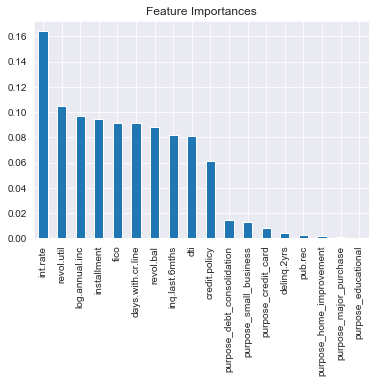

In [42]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind = 'bar', title ='Feature Importances')

In [43]:
print(confusion_matrix(y_test, pred))

[[1509  934]
 [ 167  264]]


## SMOTE Oversampling

In [44]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['not.fully.paid'], axis =1), final_data['not.fully.paid'], 
                                                    test_size = 0.30)

In [45]:
y_train.value_counts()

0    5622
1    1082
Name: not.fully.paid, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')
                    
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train,y_train )
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
col = ['not.fully.paid']
col.extend(list(X_train.columns))
oversampled_train.columns = col


In [47]:
pd.Series(oversampled_trainY).value_counts()

1    5622
0    5622
dtype: int64

In [48]:
oversampled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11244 entries, 0 to 11243
Data columns (total 19 columns):
not.fully.paid                11244 non-null int64
credit.policy                 11244 non-null float64
int.rate                      11244 non-null float64
installment                   11244 non-null float64
log.annual.inc                11244 non-null float64
dti                           11244 non-null float64
fico                          11244 non-null float64
days.with.cr.line             11244 non-null float64
revol.bal                     11244 non-null float64
revol.util                    11244 non-null float64
inq.last.6mths                11244 non-null float64
delinq.2yrs                   11244 non-null float64
pub.rec                       11244 non-null float64
purpose_credit_card           11244 non-null float64
purpose_debt_consolidation    11244 non-null float64
purpose_educational           11244 non-null float64
purpose_home_improvement      11244 non-null 

In [49]:
oversampled_train['not.fully.paid'].value_counts()

1    5622
0    5622
Name: not.fully.paid, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_train.drop('not.fully.paid', axis =1), 
                                                    oversampled_train['not.fully.paid'], 
                                                    test_size = 0.30)

## Random Grid

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 11, num = 10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
rfc = RandomForestClassifier()

In [53]:
rf_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions = random_grid,
                               n_iter = 10, cv = 3, n_jobs = -1, scoring = 'accuracy')

In [54]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [55]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [56]:
rf_random.cv_results_

{'mean_fit_time': array([ 5.78105791,  4.85226425, 33.37315853, 17.21157535, 16.1440173 ,
        16.89076869, 16.89351956, 22.26870902, 15.28515824,  2.00354632]),
 'std_fit_time': array([0.0719531 , 0.10715351, 0.06587345, 0.19539123, 0.12541609,
        0.18285396, 0.11474202, 0.03247453, 0.19291164, 0.03667713]),
 'mean_score_time': array([0.23306243, 0.24292938, 0.82712293, 0.84075228, 0.63231015,
        0.97871788, 0.67087388, 0.49733766, 0.50599035, 0.07289799]),
 'std_score_time': array([0.0195275 , 0.0067075 , 0.00863406, 0.01310536, 0.01601878,
        0.00093976, 0.00204951, 0.00448528, 0.00123218, 0.00736547]),
 'param_n_estimators': masked_array(data=[200, 400, 1400, 1200, 1000, 1400, 1400, 1600, 1800,
                    200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[100, 718, 200, 336, 981, 554, 409, 290

# Great Job!